## Part 02: Time-series properties of data and currency baskets

### In this section you will:


*   Read in data from the file you saved per Part 01on the web.
*   Create a pandas dataframe to add rows and columns to the data.
*   Use Seaborn to plot the data to check it has loaded correctly.

### Before you begin:

*   Make sure you have saved the file "returns.pkl" to your directory 


### Import necessary libraries and open saved pickle file

In [6]:
import cloudpickle as cp
import numpy as np, pandas as pd
from datetime import datetime, timedelta
import pickle
import urllib.request, urllib.parse, urllib.error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
with open('./returns.pkl', 'rb') as f:
    returns = pickle.load(f)
    f.close()

### Data Exploration
Let's get a sense of the dataset, check for missing values and generate plots to see interactions between features.

### Step 1 - General info on dataframe and check for missing data (good practice)

In [8]:
# Get a sense of the data you're working with by running describe() and info() functions in pandas
returns.describe() # You could get the same result graphically with a boxplot for each feature - due to size fo dataset, takes longer to run, so we skip for this tutorial

,AUD,CAD,CHF,EUR,GBP,JPY,NOK,NZD,SEK
count,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000
mean,-0.000021,-0.000013,0.000110,0.000053,-0.000032,0.000108,-0.000020,-0.000026,-0.000042
std,0.007243,0.004426,0.007174,0.006253,0.006021,0.006571,0.006610,0.007681,0.006651
min,-0.173282,-0.042448,-0.081256,-0.051267,-0.079760,-0.036422,-0.066231,-0.185357,-0.162568
25%,-0.003188,-0.002140,-0.003688,-0.003289,-0.003037,-0.003402,-0.003322,-0.003238,-0.003302
50%,0.000040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.003400,0.002001,0.003772,0.003264,0.003065,0.003169,0.003325,0.003475,0.003260
max,0.069302,0.051757,0.120964,0.047257,0.047780,0.068032,0.066712,0.060537,0.057042


In [9]:
# Checking for missing values, and extracting count if applicable
returns.info()
returns.isnull().sum() #returns count of missing value per feature(column)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11214 entries, 1975-01-02 to 2017-12-26
Data columns (total 9 columns):
AUD    11214 non-null float64
CAD    11214 non-null float64
CHF    11214 non-null float64
EUR    11214 non-null float64
GBP    11214 non-null float64
JPY    11214 non-null float64
NOK    11214 non-null float64
NZD    11214 non-null float64
SEK    11214 non-null float64
dtypes: float64(9)
memory usage: 876.1 KB


AUD    0
CAD    0
CHF    0
EUR    0
GBP    0
JPY    0
NOK    0
NZD    0
SEK    0
dtype: int64

### Step 2 - Calculate autocorrelations with multiple lags using basic functions

#### Calculate autocorrelation(using tips from this stackoverflow post: https://stackoverflow.com/questions/26083293/calculating-autocorrelation-of-pandas-dataframe-along-each-column)

In [10]:
def df_autocorr(df, lag=1, axis=0):
    """Compute full-sample column-wise autocorrelation for a DataFrame."""
    return df.apply(lambda col: col.autocorr(lag), axis=axis)

def df_rolling_autocorr(df, window, lag=1):
    """Compute rolling column-wise autocorrelation for a DataFrame."""

    return (df.rolling(window=window)
        .corr(df.shift(lag))) # could .dropna() here

In [11]:
autocorr_vec = lambda lag: df_autocorr(returns**2,lag=lag)
returns_autocorr = pd.DataFrame(list(map(autocorr_vec, range(1,21))),index=range(1,21))
returns_autocorr

,AUD,CAD,CHF,EUR,GBP,JPY,NOK,NZD,SEK
1,0.046911,0.145004,0.195369,0.093784,0.142757,0.144902,0.104602,0.022556,0.045624
2,0.087372,0.238803,0.073155,0.126102,0.076789,0.100601,0.113416,0.025515,0.018640
3,0.065821,0.159446,0.036269,0.087419,0.093287,0.076879,0.090786,0.024715,0.014405
4,0.064381,0.187617,0.036038,0.094089,0.130496,0.050716,0.105850,0.021205,0.015205
5,0.040423,0.142947,0.032231,0.096905,0.119499,0.072345,0.059111,0.016614,0.012136
6,0.064514,0.138358,0.035001,0.100902,0.091809,0.070595,0.093783,0.015375,0.013939
7,0.037535,0.130925,0.043176,0.068313,0.086780,0.054412,0.091033,0.013372,0.019810
8,0.040941,0.159725,0.032058,0.078285,0.071447,0.048616,0.090228,0.015702,0.017617
9,0.047971,0.173155,0.023064,0.063752,0.065920,0.068264,0.075877,0.014144,0.018242
10,0.054537,0.219433,0.019672,0.083689,0.088460,0.029843,0.094711,0.013733,0.016229


### Step 3 - Calculate DXY index (which is calculated by taking a weighted average of currencies with weights:
Euro (EUR), 57.6% weight
Japanese yen (JPY) 13.6% weight
Pound sterling (GBP), 11.9% weight
Canadian dollar (CAD), 9.1% weight
Swedish krona (SEK), 4.2% weight
Swiss franc (CHF) 3.6% weight


In [12]:
dxy_weight = [0, 0.119, 0.036, 0, 0.136, 0.576, 0, 0, 0.091]
dxy = returns.dot(dxy_weight)
# print(dxy)
returns['DXY'] = dxy.copy()
print(returns.head())

                 AUD       CAD       CHF       EUR       GBP       JPY  \
1975-01-02 -0.002129 -0.001712 -0.009915 -0.003544 -0.005745 -0.001502   
1975-01-03 -0.000947  0.000015  0.008500  0.007886  0.003424  0.002711   
1975-01-06 -0.001158  0.000668 -0.001023  0.008174  0.002346 -0.004728   
1975-01-07  0.004193 -0.001726  0.001702  0.002150  0.001702  0.002410   
1975-01-08 -0.001489 -0.000200 -0.015237 -0.008650 -0.001997  0.000122   

                 NOK       NZD       SEK       DXY  
1975-01-02 -0.003299  0.000536 -0.004704 -0.002635  
1975-01-03  0.008801 -0.001924  0.007113  0.002982  
1975-01-06  0.002759 -0.001129  0.009237 -0.001521  
1975-01-07  0.005434  0.004567 -0.001466  0.001342  
1975-01-08 -0.006315 -0.000034 -0.006188 -0.001337  


### Step 4- Calculate autocorrelation and partial autocorrelation functions with the statsmodels package to get error bounds on plots

#### An autocorrelation function (ACF) is a plot of the calculated correlation of the time series observations with values of the same series at previous times (lag). The ACF indicates how well a value relates to its previous lagged values (both direct and indirect relationships of dependence)

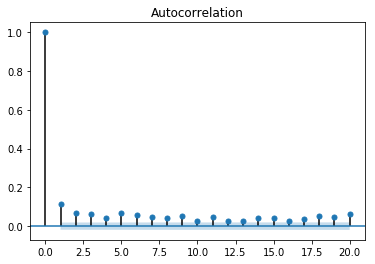

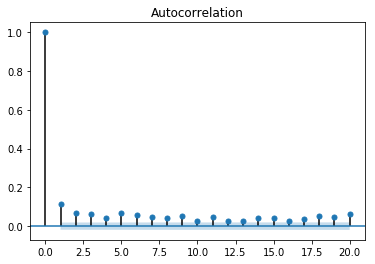

In [13]:
plot_acf(returns['DXY']**2, lags=20)

#### A partial autocorrelation function (PACF) is a plot of is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed. The PACF indicates how well a value relates to its last lagged values (only direct relationship of dependence)

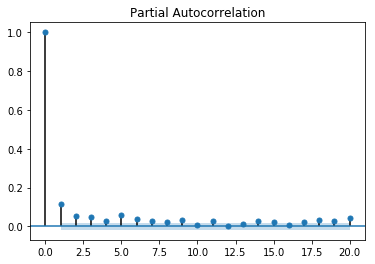

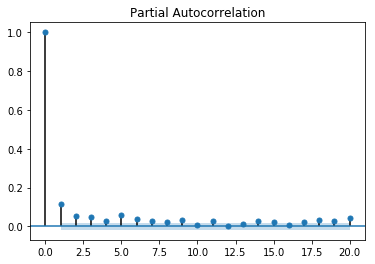

In [14]:
plot_pacf(returns['DXY']**2, lags=20)

### Step 5 - More exploration. Let's see how each currency correlates to one another.
#### Run seaborn plot and look at marginal distributions (histograms) and joint distributions (scatter plots) to see correlation between features. If you plot with a regression line,you will see the strength of correlation between features.

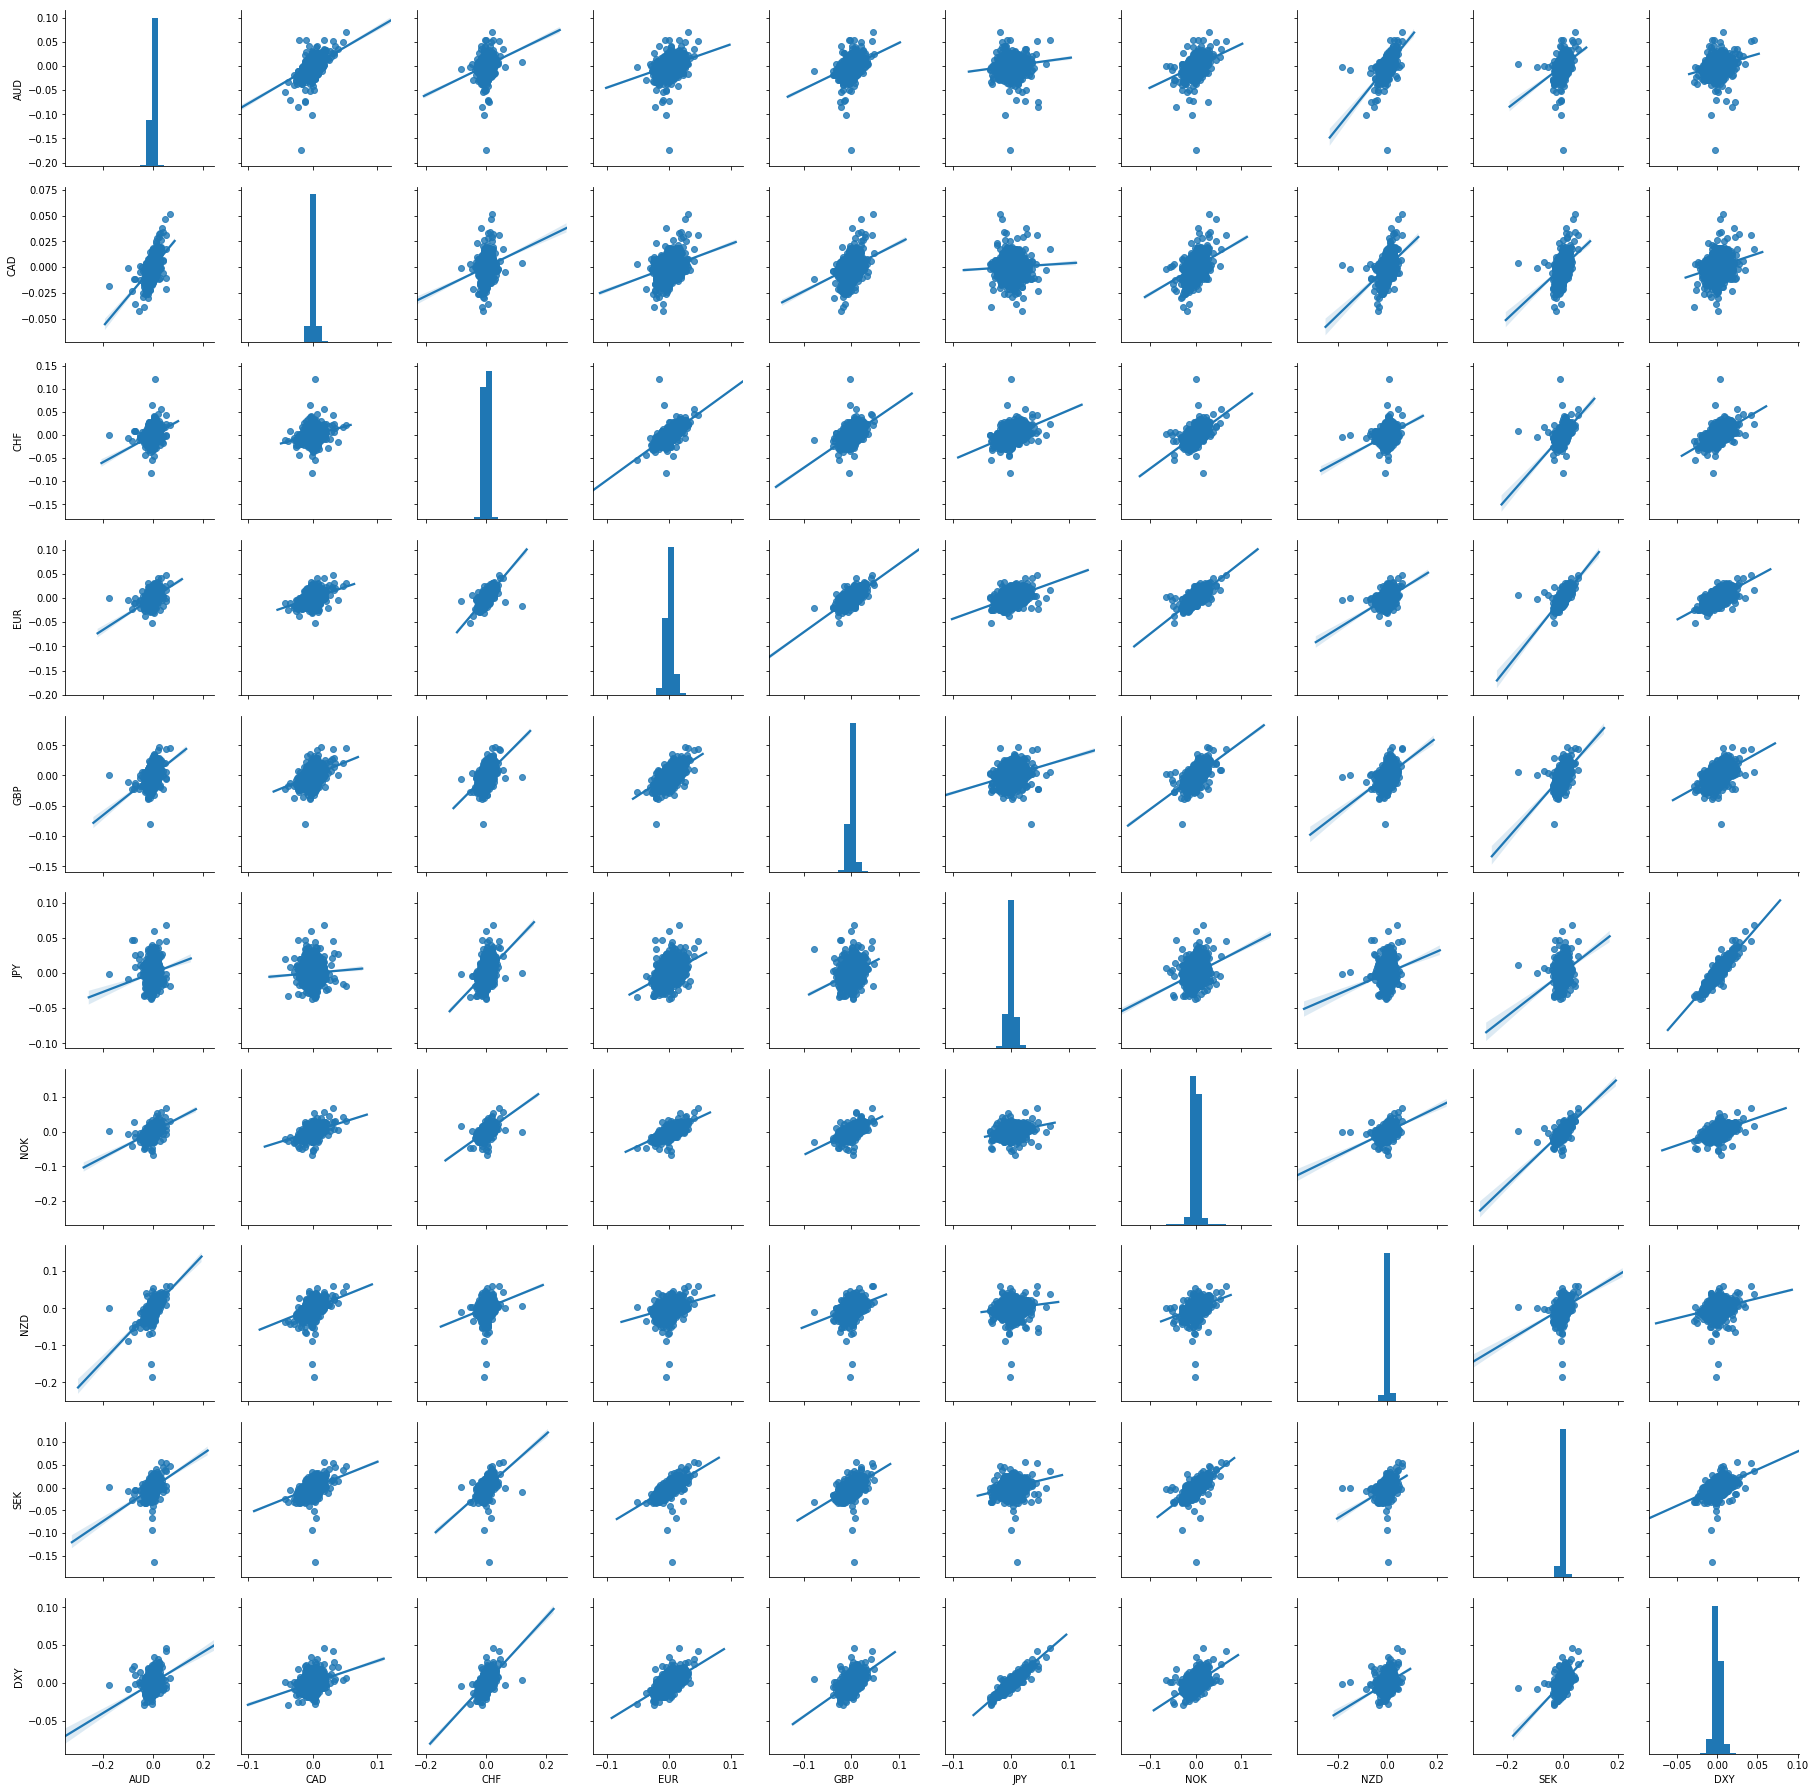

In [15]:
sns.pairplot(returns, kind = "reg")

(1305.0, 12518.0, -1.1, 1.1)

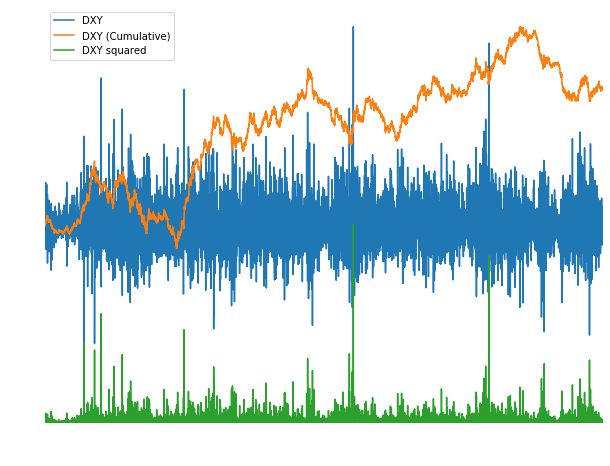

In [29]:
X = pd.concat([dxy, dxy.cumsum(), dxy**2], axis=1)
X.columns = ['DXY','DXY (Cumulative)','DXY squared']
X /= X.max()
X['DXY squared'] -= 1
X.plot(figsize = (10,8))
plt.axis('off')